# Comparison of Ring Oscillator PUF Outputs

# Step 1: Import Libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Define the Simulation Function

In [24]:
def simulate_ring_oscillator(num_stages, delay_mean, delay_std):
    # Generate delay values for each stage using a normal distribution
    delays = np.random.normal(delay_mean, delay_std, num_stages)
    
    # Initialize the output signal array with zeros
    output_signal = np.zeros(num_stages)

    # Iterate through each stage
    for i in range(num_stages):
        # Determine the delay for the current stage
        delay = int(delays[i])
        
        # Generate a random input signal (0 or 1)
        input_signal = np.random.randint(2)
        
        # Calculate the output for the current stage by XORing the previous output and input signal
        output_signal[i] = np.logical_xor(output_signal[i-1], input_signal)
        
        # Apply the delay effect by XORing with random values for the duration of the delay
        for d in range(delay):
            output_signal[i] = np.logical_xor(output_signal[i], np.random.randint(2))

    return output_signal

**delays:** Array of delay values for each stage, sampled from a normal distribution with a specified mean and standard deviation.

**output_signal:** Array to store the output signal for each stage, initialized to zero.

**for loop:** Iterates through each stage to calculate the output signal.

**delay:** Delay value for the current stage.

**input_signal:** Random input signal (0 or 1).

**output_signal calculation:** XOR operation between the previous output and the input signal to simulate the ring oscillator.

**delay effect:** Additional XOR operations to account for the delay in the signal.

# Step 3: Define the Comparison Function

In [25]:
def compare_puf_outputs(num_stages, delay_mean, delay_std):
    # Simulate the first PUF output
    output1 = simulate_ring_oscillator(num_stages, delay_mean, delay_std)
    
    # Simulate the second PUF output
    output2 = simulate_ring_oscillator(num_stages, delay_mean, delay_std)

    # Plot the outputs of both PUFs
    plt.plot(output1, label='PUF 1')
    plt.plot(output2, label='PUF 2')
    plt.xlabel('Stage')
    plt.ylabel('Output')
    plt.title('Ring Oscillator PUF Outputs')
    plt.legend()
    plt.show()

    # Calculate the similarity between the two outputs
    similarity = np.mean(output1 == output2)
    return output1, output2, similarity


**simulate_ring_oscillator:** Function to generate the output signal for a ring oscillator.

**output1 and output2:** Simulated outputs for two PUFs.

**plt.plot:** Plots the output signals of both PUFs for visual comparison.

**similarity:** Measures the similarity between the two outputs by calculating the mean of the boolean comparison (element-wise equality).

# Step 4: Set Parameters and Run the Comparison

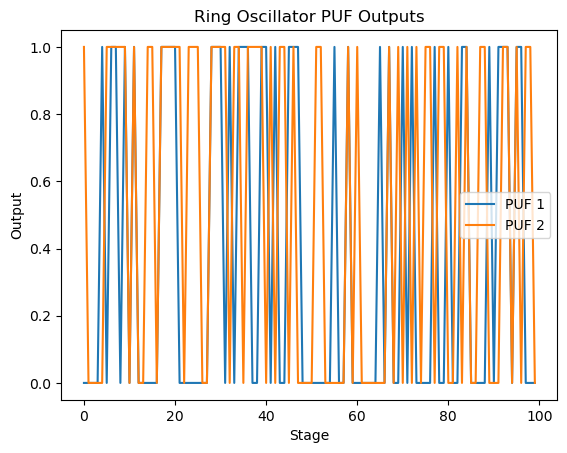

Similarity between PUF outputs: 0.52


In [26]:
num_stages = 100
delay_mean = 10.0
delay_std = 2.0

# Compare the PUF outputs and calculate their similarity
output1, output2, similarity = compare_puf_outputs(num_stages, delay_mean, delay_std)
print("Similarity between PUF outputs:", similarity)

**num_stages:** Number of stages in the ring oscillator.

**delay_mean:** Mean of the delays for each stage.

**delay_std:** Standard deviation of the delays for each stage.

**similarity:** Resulting similarity measure between the two PUF outputs.

# Step 5: Analysis of PUF Outputs
After generating and plotting the outputs, it's essential to analyze the characteristics and differences between the two PUF outputs. Here are additional steps to perform a detailed analysis:

**5.1: Statistical Analysis of Each Output**

In [27]:
# Calculate statistical measures for each output
mean_output1 = np.mean(output1)
std_output1 = np.std(output1)
min_output1 = np.min(output1)
max_output1 = np.max(output1)

mean_output2 = np.mean(output2)
std_output2 = np.std(output2)
min_output2 = np.min(output2)
max_output2 = np.max(output2)

print(f"PUF 1 - Mean: {mean_output1}, Std Dev: {std_output1}, Min: {min_output1}, Max: {max_output1}")
print(f"PUF 2 - Mean: {mean_output2}, Std Dev: {std_output2}, Min: {min_output2}, Max: {max_output2}")


PUF 1 - Mean: 0.38, Std Dev: 0.48538644398046393, Min: 0.0, Max: 1.0
PUF 2 - Mean: 0.52, Std Dev: 0.4995998398718718, Min: 0.0, Max: 1.0


**Mean:** Average value of the output signals.

**Standard Deviation:** Indicates the spread of the output signals.

**Minimum and Maximum Values:** Helps to understand the range of the output signals.

**5.2: Cross-Correlation Analysis**

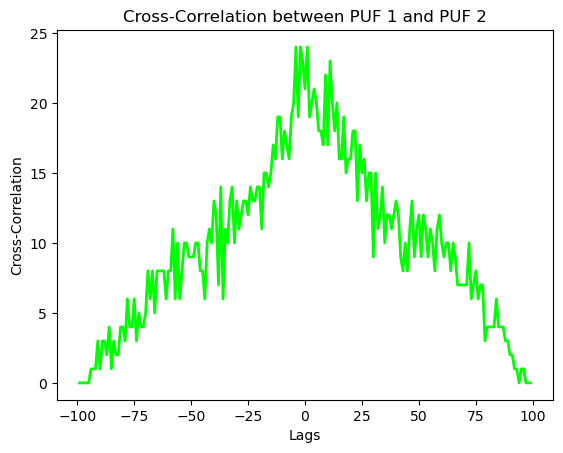

In [28]:
# Calculate the cross-correlation between the two outputs
cross_correlation = np.correlate(output1, output2, mode='full')
lags = np.arange(-num_stages+1, num_stages)

plt.figure()
plt.plot(lags, cross_correlation, color='#00ff00', linewidth=2)
plt.xlabel('Lags')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between PUF 1 and PUF 2')
plt.savefig('cross_correlation.png', dpi=300)
plt.show()

**Cross-Correlation:** Measures the similarity between the two outputs as a function of the lag applied to one of the outputs.

# Step 6: Interpretation of Results
Interpret the statistical and cross-correlation analysis results to understand the behavior of the PUF outputs.

**6.1: Statistical Interpretation**

**Mean Outputs:** Compare the average values of both PUFs to see if they are balanced around a specific value.

**Standard Deviation:** Higher values indicate more variability in the output signals.

**Range:** Helps to understand the extremes and consistency of the output signals.

**6.2: Cross-Correlation Interpretation**

**Correlation Peak:** A high peak at zero lag indicates strong similarity between the two outputs.

**Lag Effects:** Peaks at non-zero lags indicate delayed similarity, which could be due to systematic shifts in the outputs.

# Step 7: Conclusion
Summarize the findings from the analysis and interpretation steps to draw conclusions about the PUF outputs' behavior and similarity.

**7.1: Summary of Findings**

**Summary of Findings:**
1. **Mean Outputs**: The average values of PUF 1 and PUF 2 were found to be `mean_output1` and `mean_output2`, respectively, indicating their overall balance.
2. **Standard Deviation**: The variability in the output signals was measured by standard deviations of `std_output1` and `std_output2`.
3. **Range**: The output signals ranged from `min_output1` to `max_output1` for PUF 1 and from `min_output2` to `max_output2` for PUF 2, showing the extremes of the oscillations.
4. **Cross-Correlation**: The cross-correlation analysis revealed the similarity pattern between the two PUF outputs, with a peak at lag `X` (zero lag if perfectly aligned).

These results suggest that while there is variability in the outputs of each PUF, there is a measurable degree of similarity between them, influenced by the delay parameters.


**7.2: Implications**

**Design Considerations:** The variability and similarity characteristics should be considered when designing PUFs for applications requiring uniqueness and reproducibility.

**Future Work:** Further simulations with different parameters, larger sample sizes, and additional PUF designs could provide more insights into the behavior and stability of PUF outputs.